In [125]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from src.data import load_data
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
sns.set_style("whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [34]:
df = pd.read_csv('../data/raw/PJME_hourly.csv', parse_dates=['Datetime'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [35]:
df = df.sort_values("Datetime")
print(df["Datetime"].is_monotonic_increasing)   # should be True
print(df["Datetime"].duplicated().sum())

True
4


In [36]:
df.isna().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [37]:
# we have 4 duplicated rows
# find duplicated timestamps
dupes = df[df["Datetime"].duplicated(keep=False)]

# show them grouped by timestamp
dupes.groupby("Datetime")["PJME_MW"].apply(list)

Datetime
2014-11-02 02:00:00    [23755.0, 22935.0]
2015-11-01 02:00:00    [21567.0, 21171.0]
2016-11-06 02:00:00    [20795.0, 21692.0]
2017-11-05 02:00:00    [21236.0, 20666.0]
Name: PJME_MW, dtype: object

In [38]:
# the values are different, so will just average
df = df.groupby("Datetime", as_index=False)["PJME_MW"].mean()

print(df["Datetime"].duplicated().sum())
df

0


,Datetime,PJME_MW
0,2002-01-01 01:00:00,30393.0
1,2002-01-01 02:00:00,29265.0
2,2002-01-01 03:00:00,28357.0
3,2002-01-01 04:00:00,27899.0
4,2002-01-01 05:00:00,28057.0
...,...,...
145357,2018-08-02 20:00:00,44057.0
145358,2018-08-02 21:00:00,43256.0
145359,2018-08-02 22:00:00,41552.0
145360,2018-08-02 23:00:00,38500.0


In [39]:
df = df.set_index("Datetime").sort_index()
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [43]:
df.to_parquet("../data/interim/pjme_hourly.parquet", index=True)

In [45]:
pd.read_parquet("../data/interim/pjme_hourly.parquet").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145362 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145362 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


### Aggregate to daily:

In [47]:
df_daily = df.resample("D").sum()
df_daily.to_parquet("../data/interim/pjme_daily.parquet")

In [48]:
df_daily

,PJME_MW
Datetime,
2002-01-01,714857.0
2002-01-02,822277.0
2002-01-03,828285.0
2002-01-04,809171.0
2002-01-05,729723.0
...,...
2018-07-30,790978.0
2018-07-31,828938.0
2018-08-01,941539.0


In [49]:
df_daily.to_period(freq='D')

,PJME_MW
Datetime,
2002-01-01,714857.0
2002-01-02,822277.0
2002-01-03,828285.0
2002-01-04,809171.0
2002-01-05,729723.0
...,...
2018-07-30,790978.0
2018-07-31,828938.0
2018-08-01,941539.0


In [129]:
df = load_data(to_period=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 6059 entries, 2002-01-01 to 2018-08-03
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  6059 non-null   float64
dtypes: float64(1)
memory usage: 94.7 KB
None


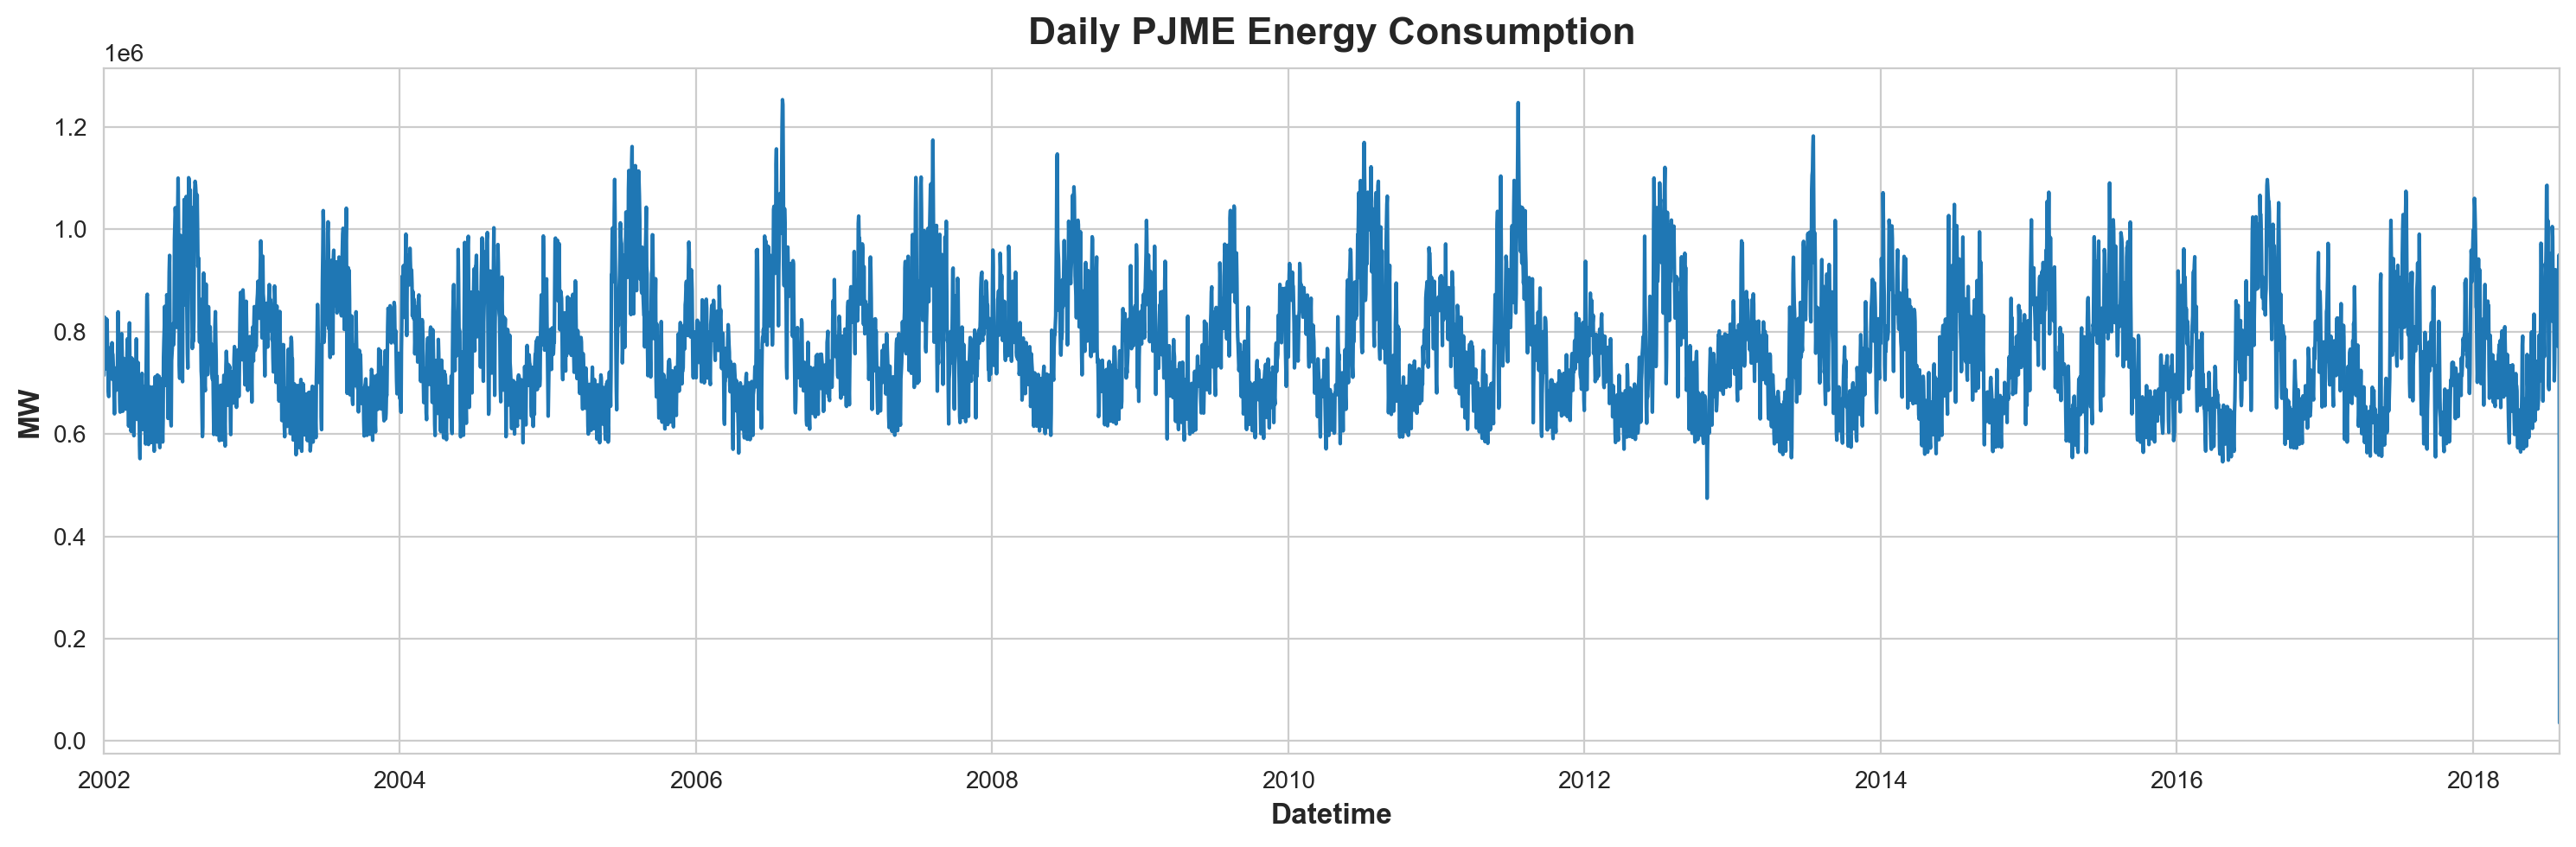

In [130]:

df["PJME_MW"].plot(figsize=(15, 5), title="Daily PJME Energy Consumption")
sns.set_style("whitegrid")
plt.ylabel("MW")
plt.savefig("../reports/figures/pjme_daily_full.png", dpi=200, bbox_inches="tight")

zoom in on a 2 year period

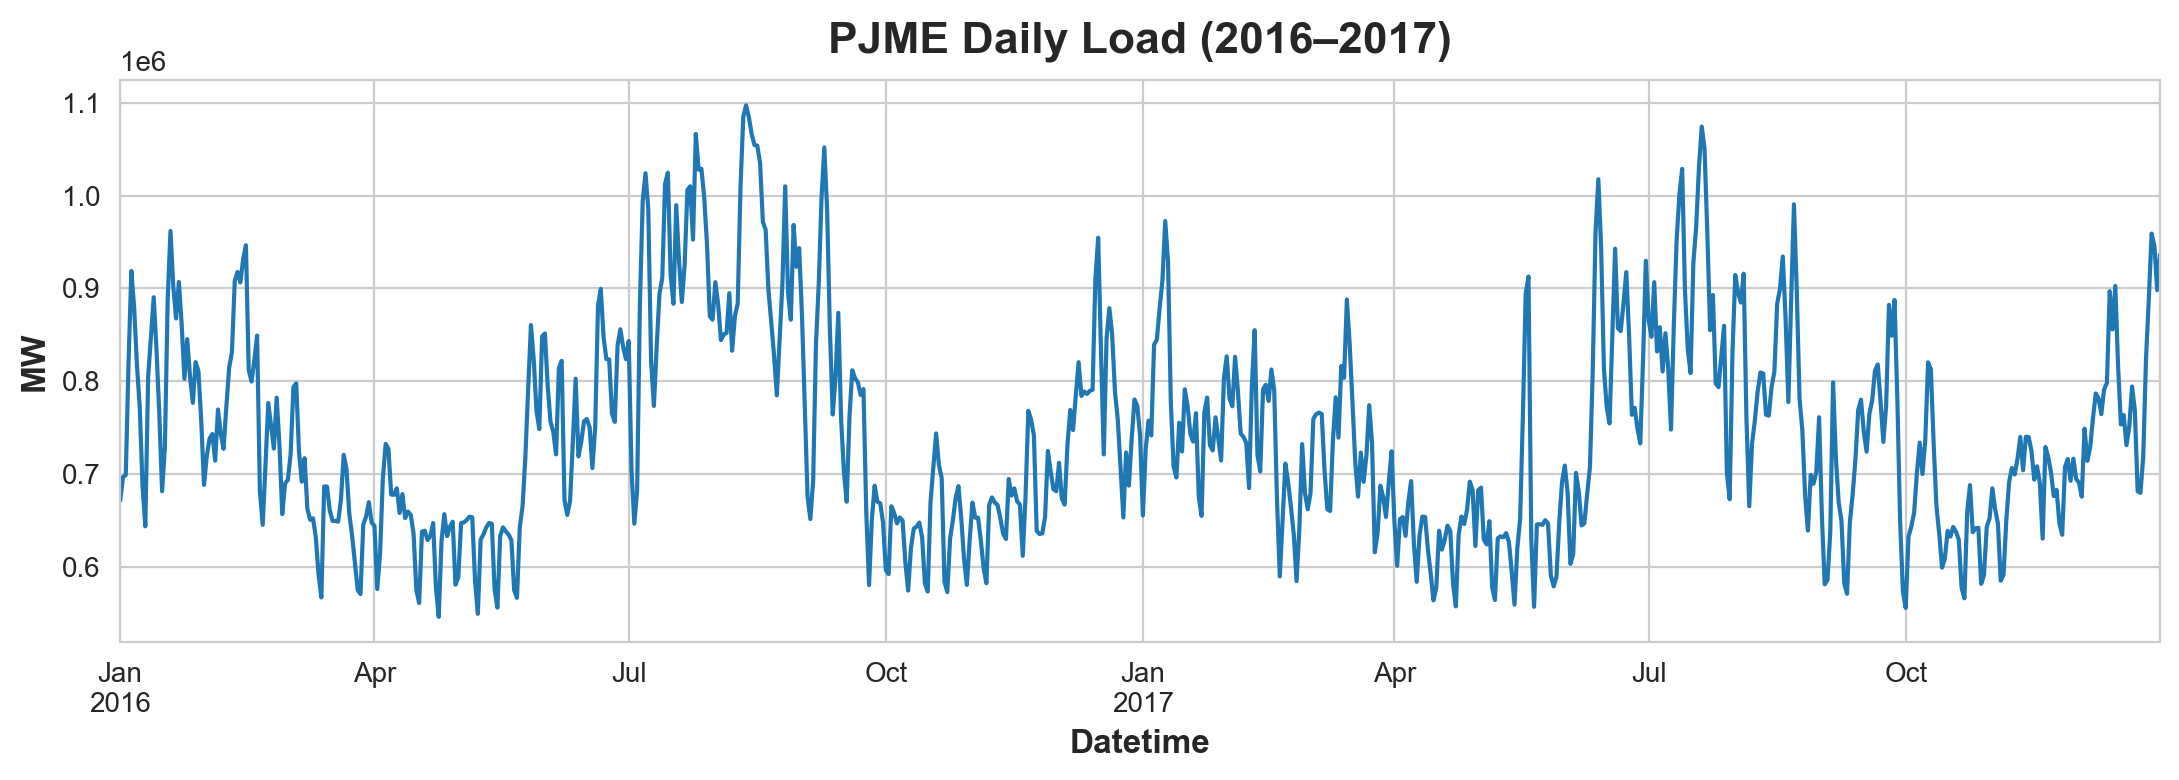

In [132]:
df["2016":"2017"]["PJME_MW"].plot(title="PJME Daily Load (2016–2017)")
plt.ylabel("MW")
plt.savefig("../reports/figures/pjme_daily_2016-17.png", dpi=200, bbox_inches="tight")

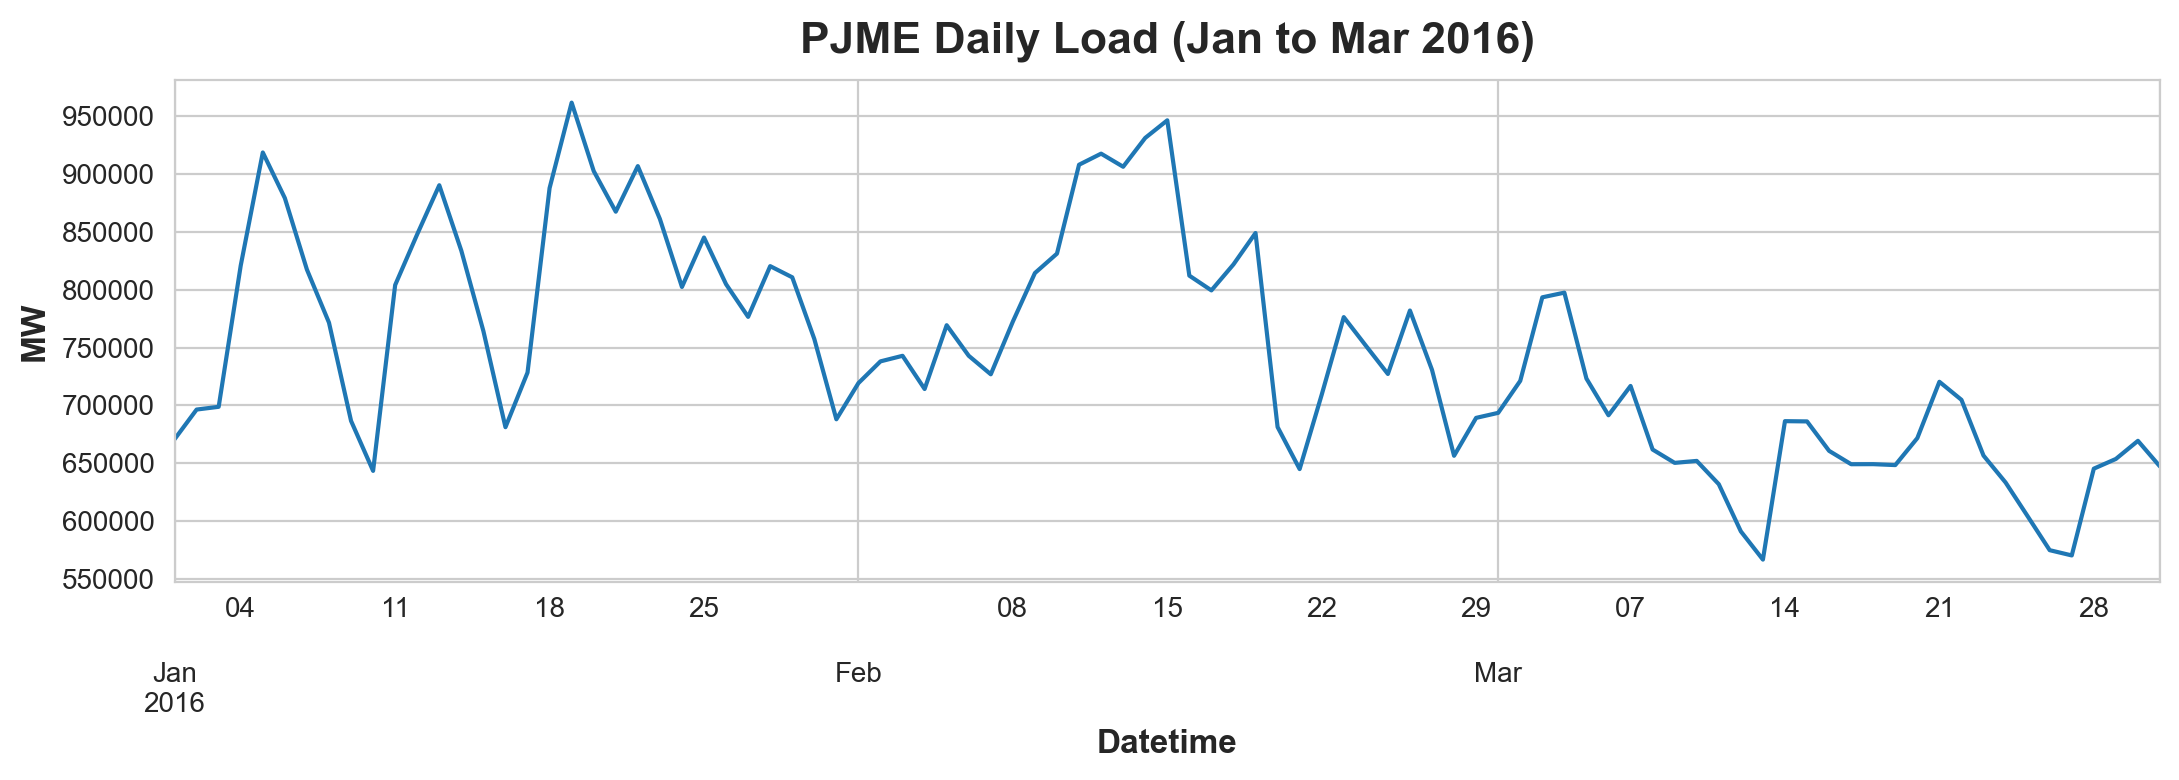

In [134]:
# zoom in on a 2 month period
df["2016-01":"2016-03"]["PJME_MW"].plot(title="PJME Daily Load (Jan to Mar 2016)")
plt.ylabel("MW")
plt.savefig("../reports/figures/pjme_daily_jan-march.png", dpi=200, bbox_inches="tight")

In [77]:
# add a weekday column
df["weekday"] = df.index.dayofweek
df


,PJME_MW,weekday
Datetime,,
2002-01-01,714857.0,1
2002-01-02,822277.0,2
2002-01-03,828285.0,3
2002-01-04,809171.0,4
2002-01-05,729723.0,5
...,...,...
2018-07-30,790978.0,0
2018-07-31,828938.0,1
2018-08-01,941539.0,2


In [79]:
avg_by_wd = df.groupby('weekday')["PJME_MW"].mean()
avg_by_wd

weekday
0    784128.682081
1    798495.957275
2    798275.939954
3    794060.585450
4    783608.438799
5    723909.134104
6    704934.352023
Name: PJME_MW, dtype: float64

In [80]:
wd_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
avg_by_wd.rename(index=wd_map, inplace=True)
avg_by_wd

weekday
Mon    784128.682081
Tue    798495.957275
Wed    798275.939954
Thu    794060.585450
Fri    783608.438799
Sat    723909.134104
Sun    704934.352023
Name: PJME_MW, dtype: float64

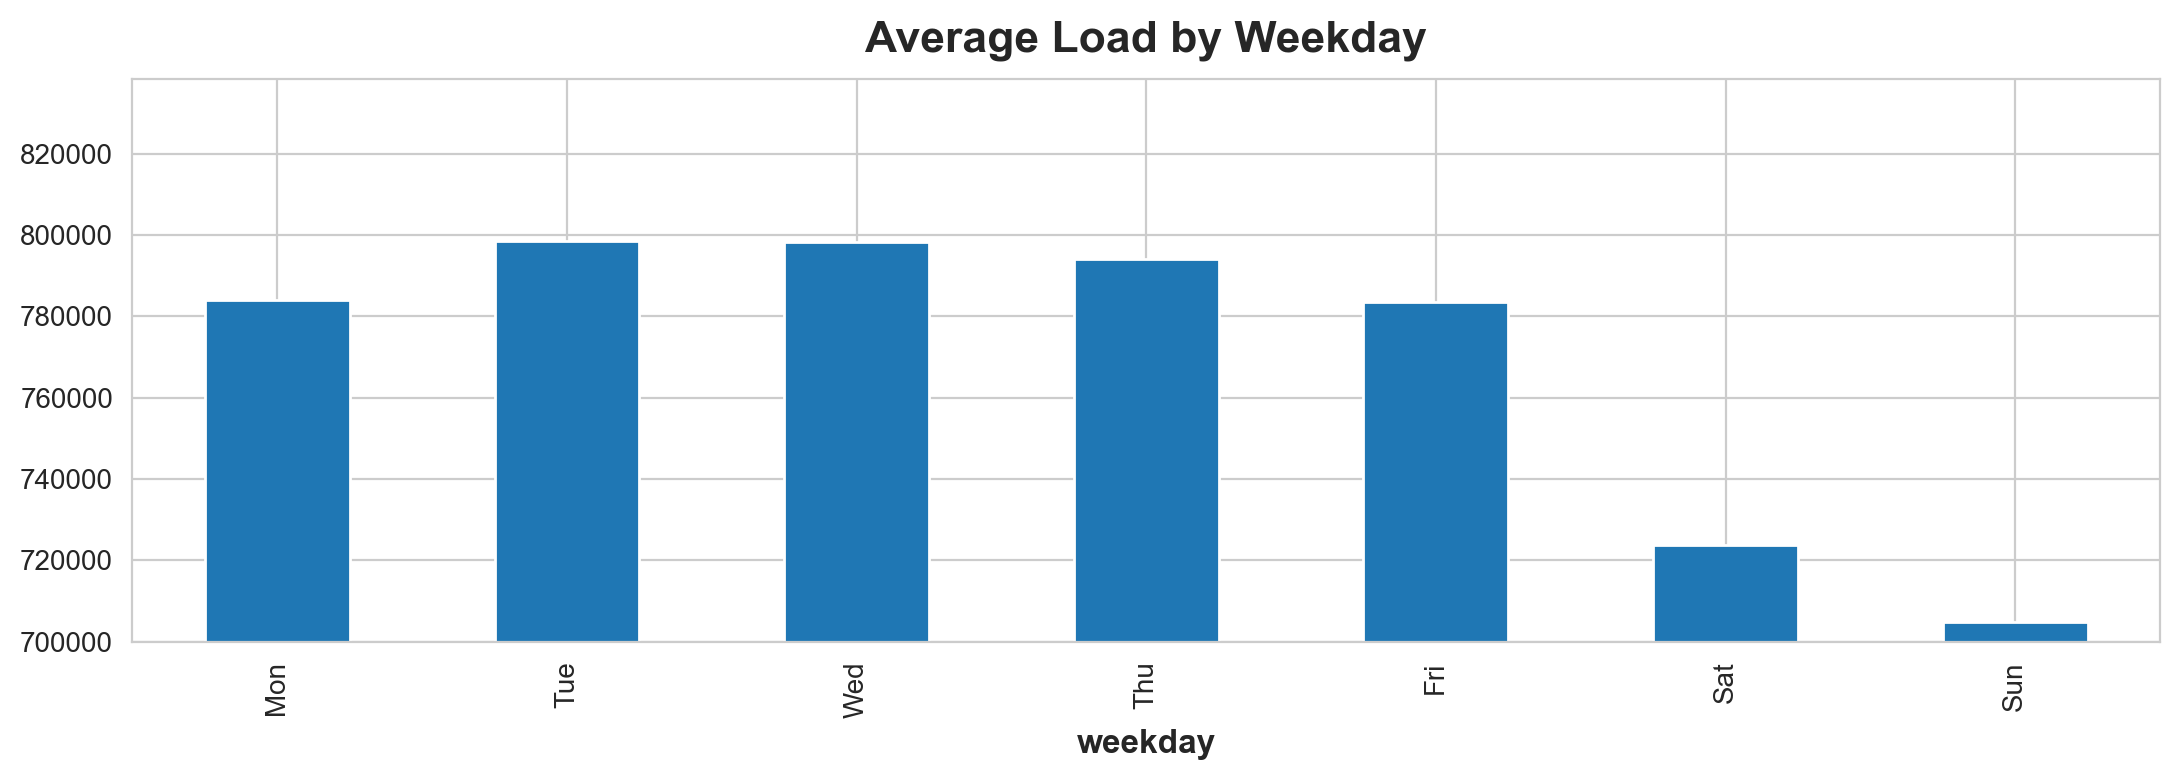

In [135]:
avg_by_wd.plot(kind="bar", title="Average Load by Weekday")
plt.ylim(700000, None)
plt.savefig("../reports/figures/avg_by_weekday.png", dpi=200, bbox_inches="tight")

Plot shows that weekends have lower average load

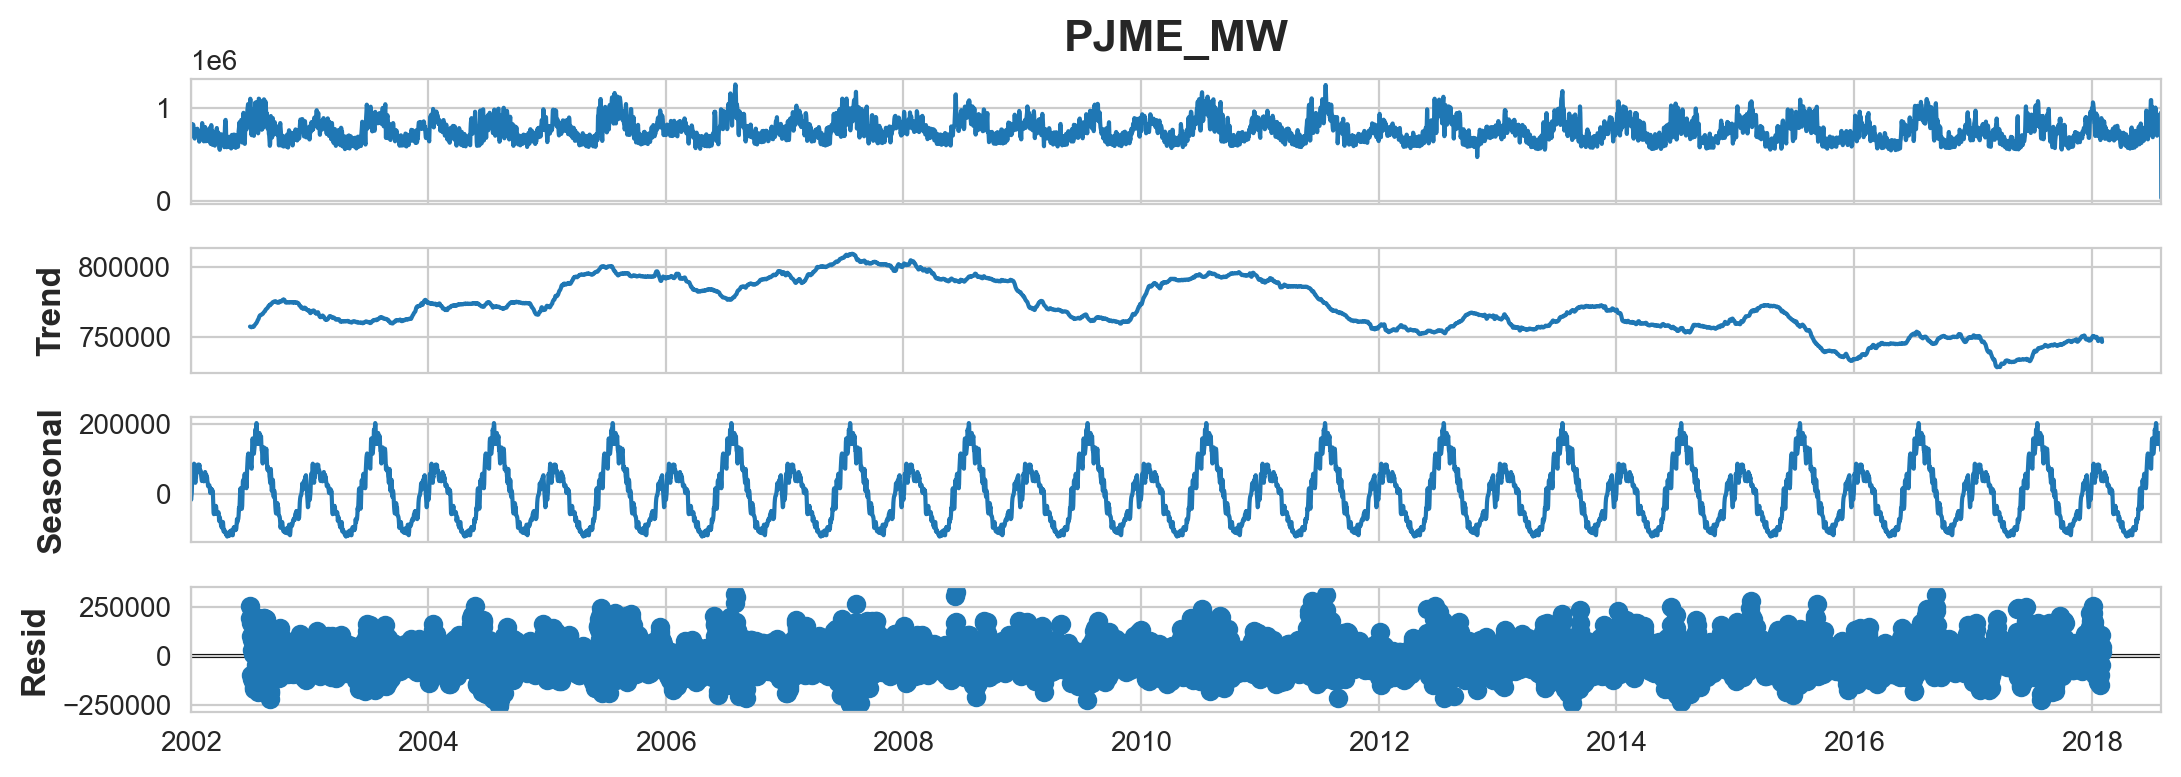

In [136]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df = load_data()

# seasonal period: 365 days for yearly seasonality in daily data
result = seasonal_decompose(df["PJME_MW"], model="additive", period=365)

result.plot()
plt.savefig("../reports/figures/seasonal_decomp_full.png", dpi=200, bbox_inches="tight")

Strong yearly seasonality:

	- Winter & summer = high demand (heating + cooling loads).
	- Spring & fall = lower demand (milder temperatures).

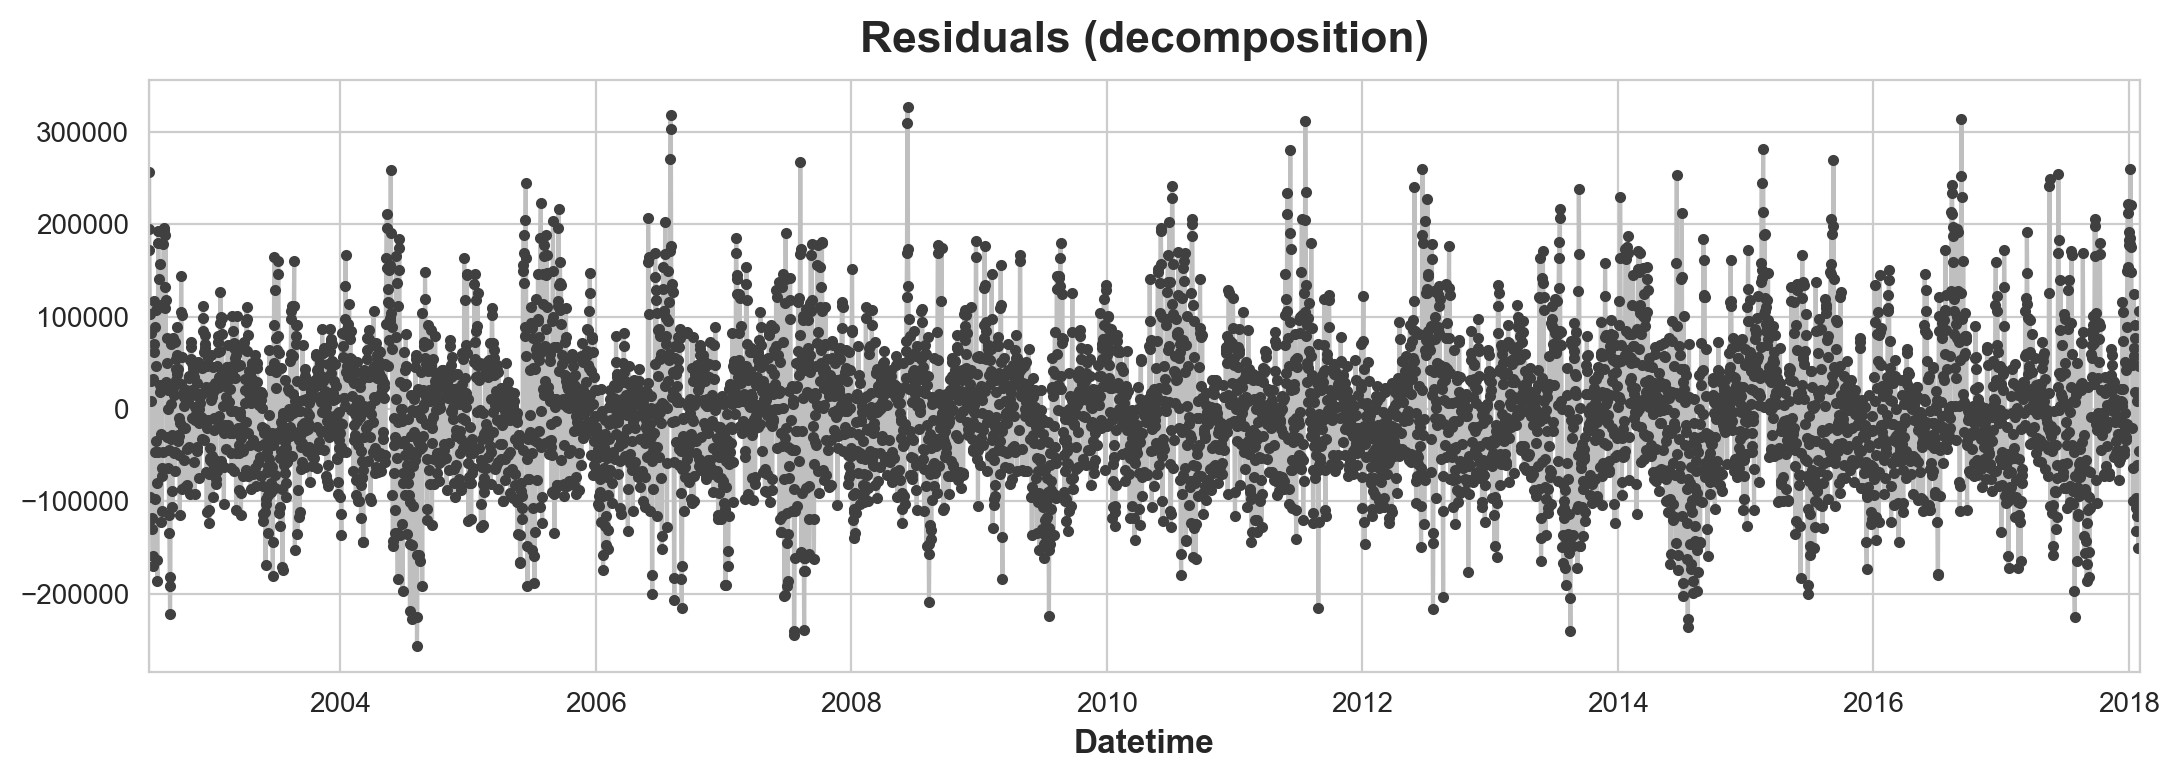

In [137]:
r = result.resid.dropna()
ax = r.plot(title="Residuals (decomposition)", **plot_params)
plt.savefig("../reports/figures/residuals(decomp).png", dpi=200, bbox_inches="tight")

Plot average load by month:

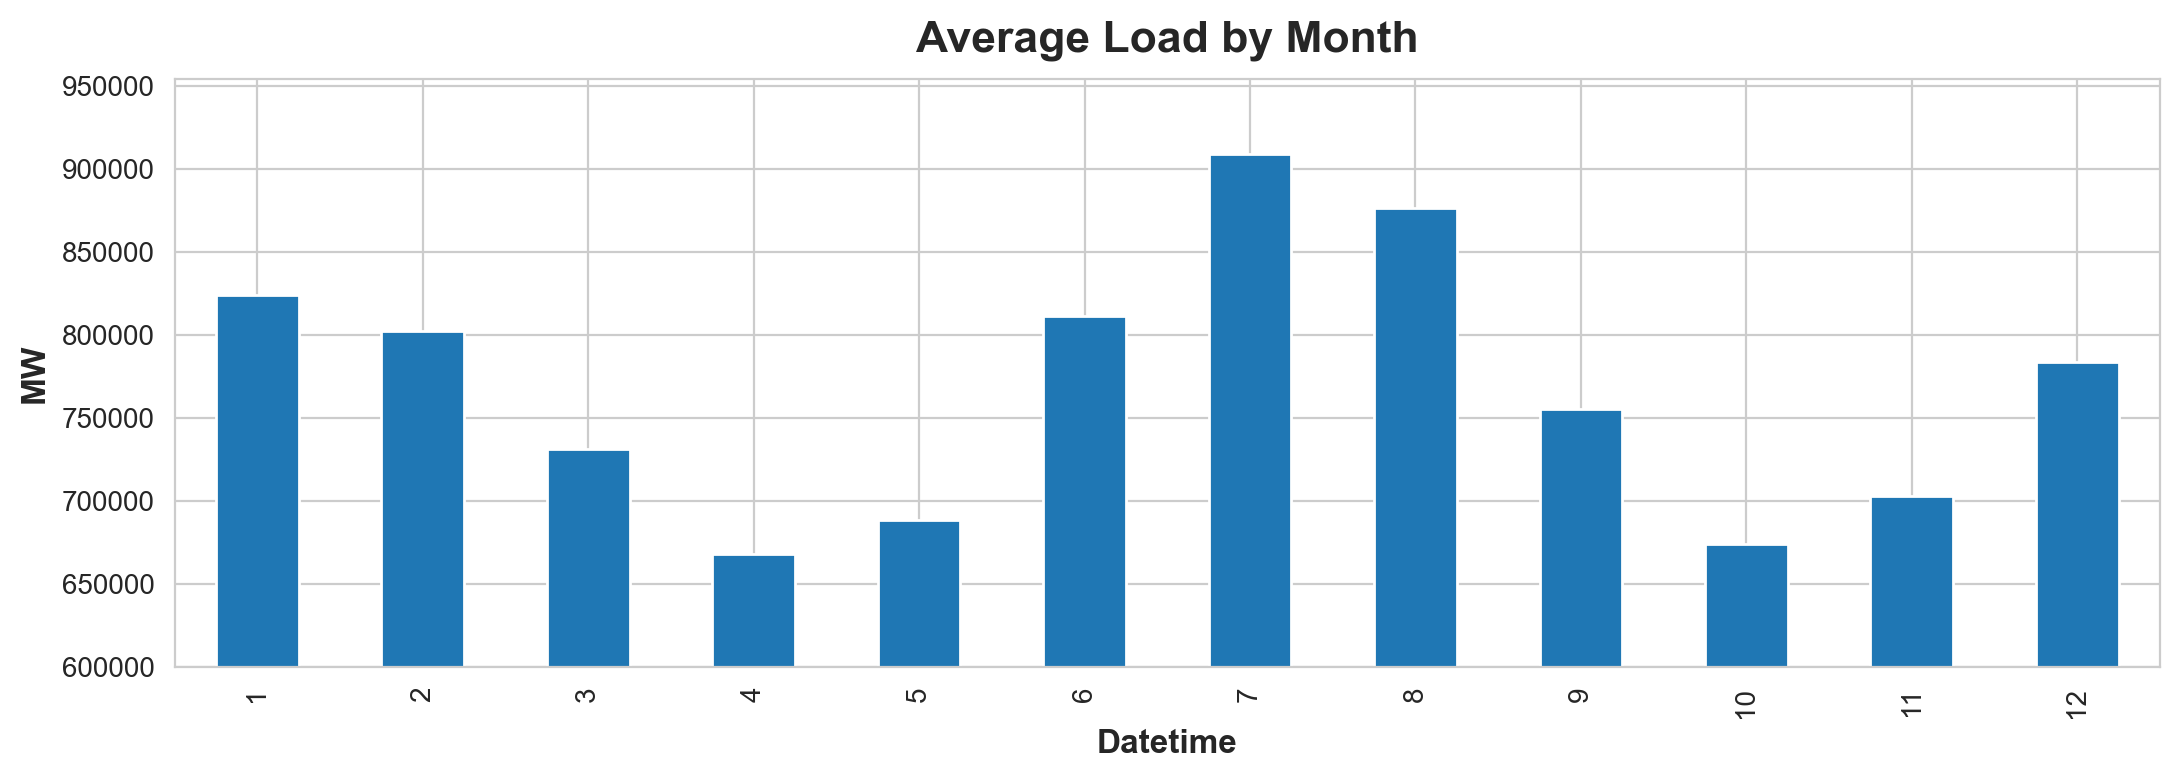

In [138]:
df = load_data(to_period=True)
avg_month = df.groupby(df.index.month)['PJME_MW'].mean()
avg_month.plot(kind="bar", title="Average Load by Month")
plt.ylabel("MW")
plt.ylim(600000, None)
plt.savefig("../reports/figures/avg_monthly_full.png", dpi=200, bbox_inches="tight")

Peaks in Summer (July/August) and also high in Winter (Dec/Jan/Feb)

### Next, Autocorrelation Analysis:

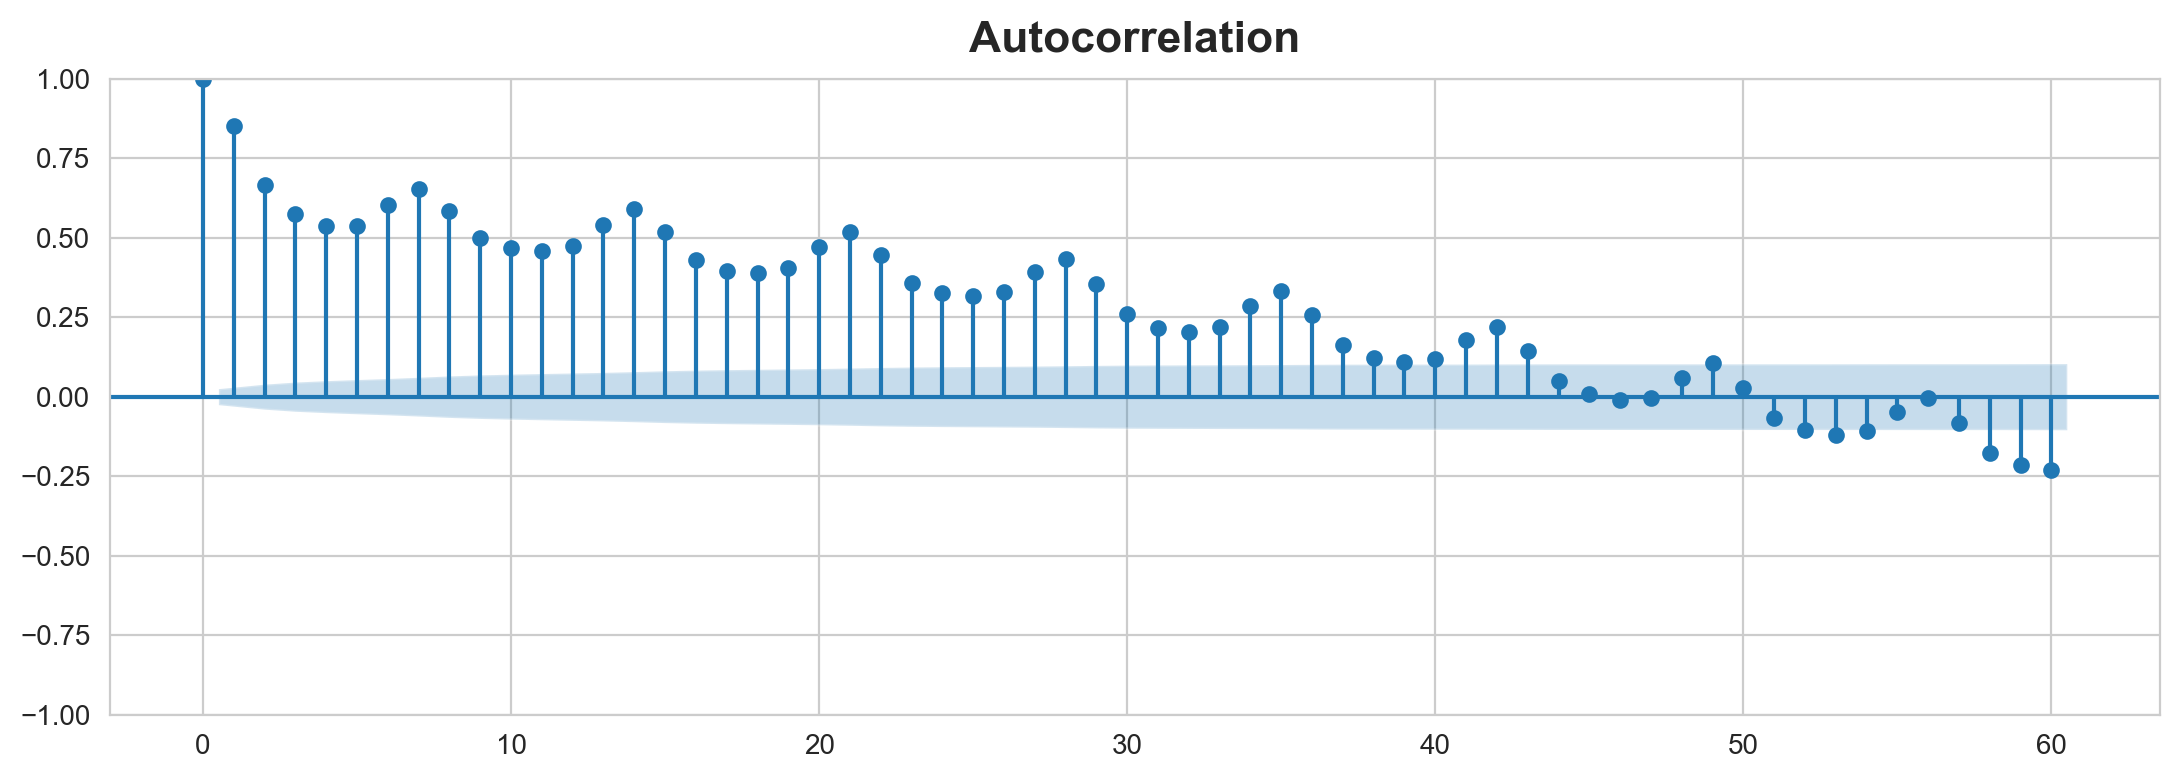

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["PJME_MW"], lags=60) # first 60 days
plt.savefig("../reports/figures/acf_plot.png", dpi=200, bbox_inches="tight")

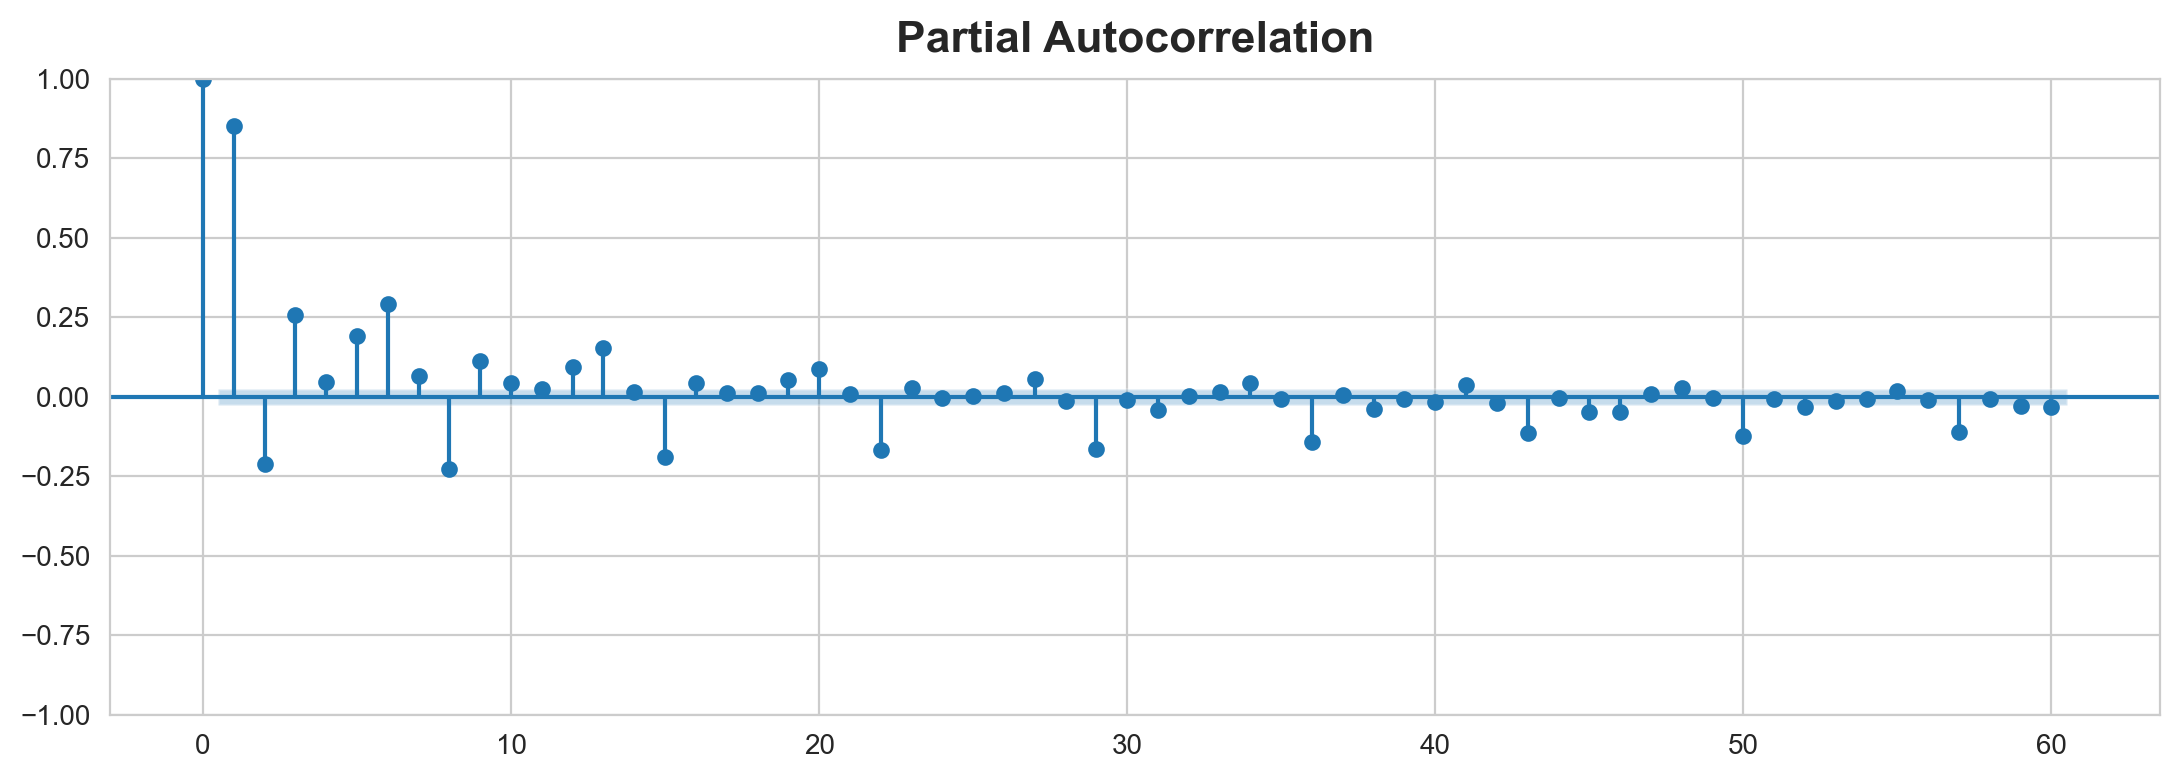

In [140]:
plot_pacf(df["PJME_MW"], lags=60)
plt.savefig("../reports/figures/pacf_plot.png", dpi=200, bbox_inches="tight")

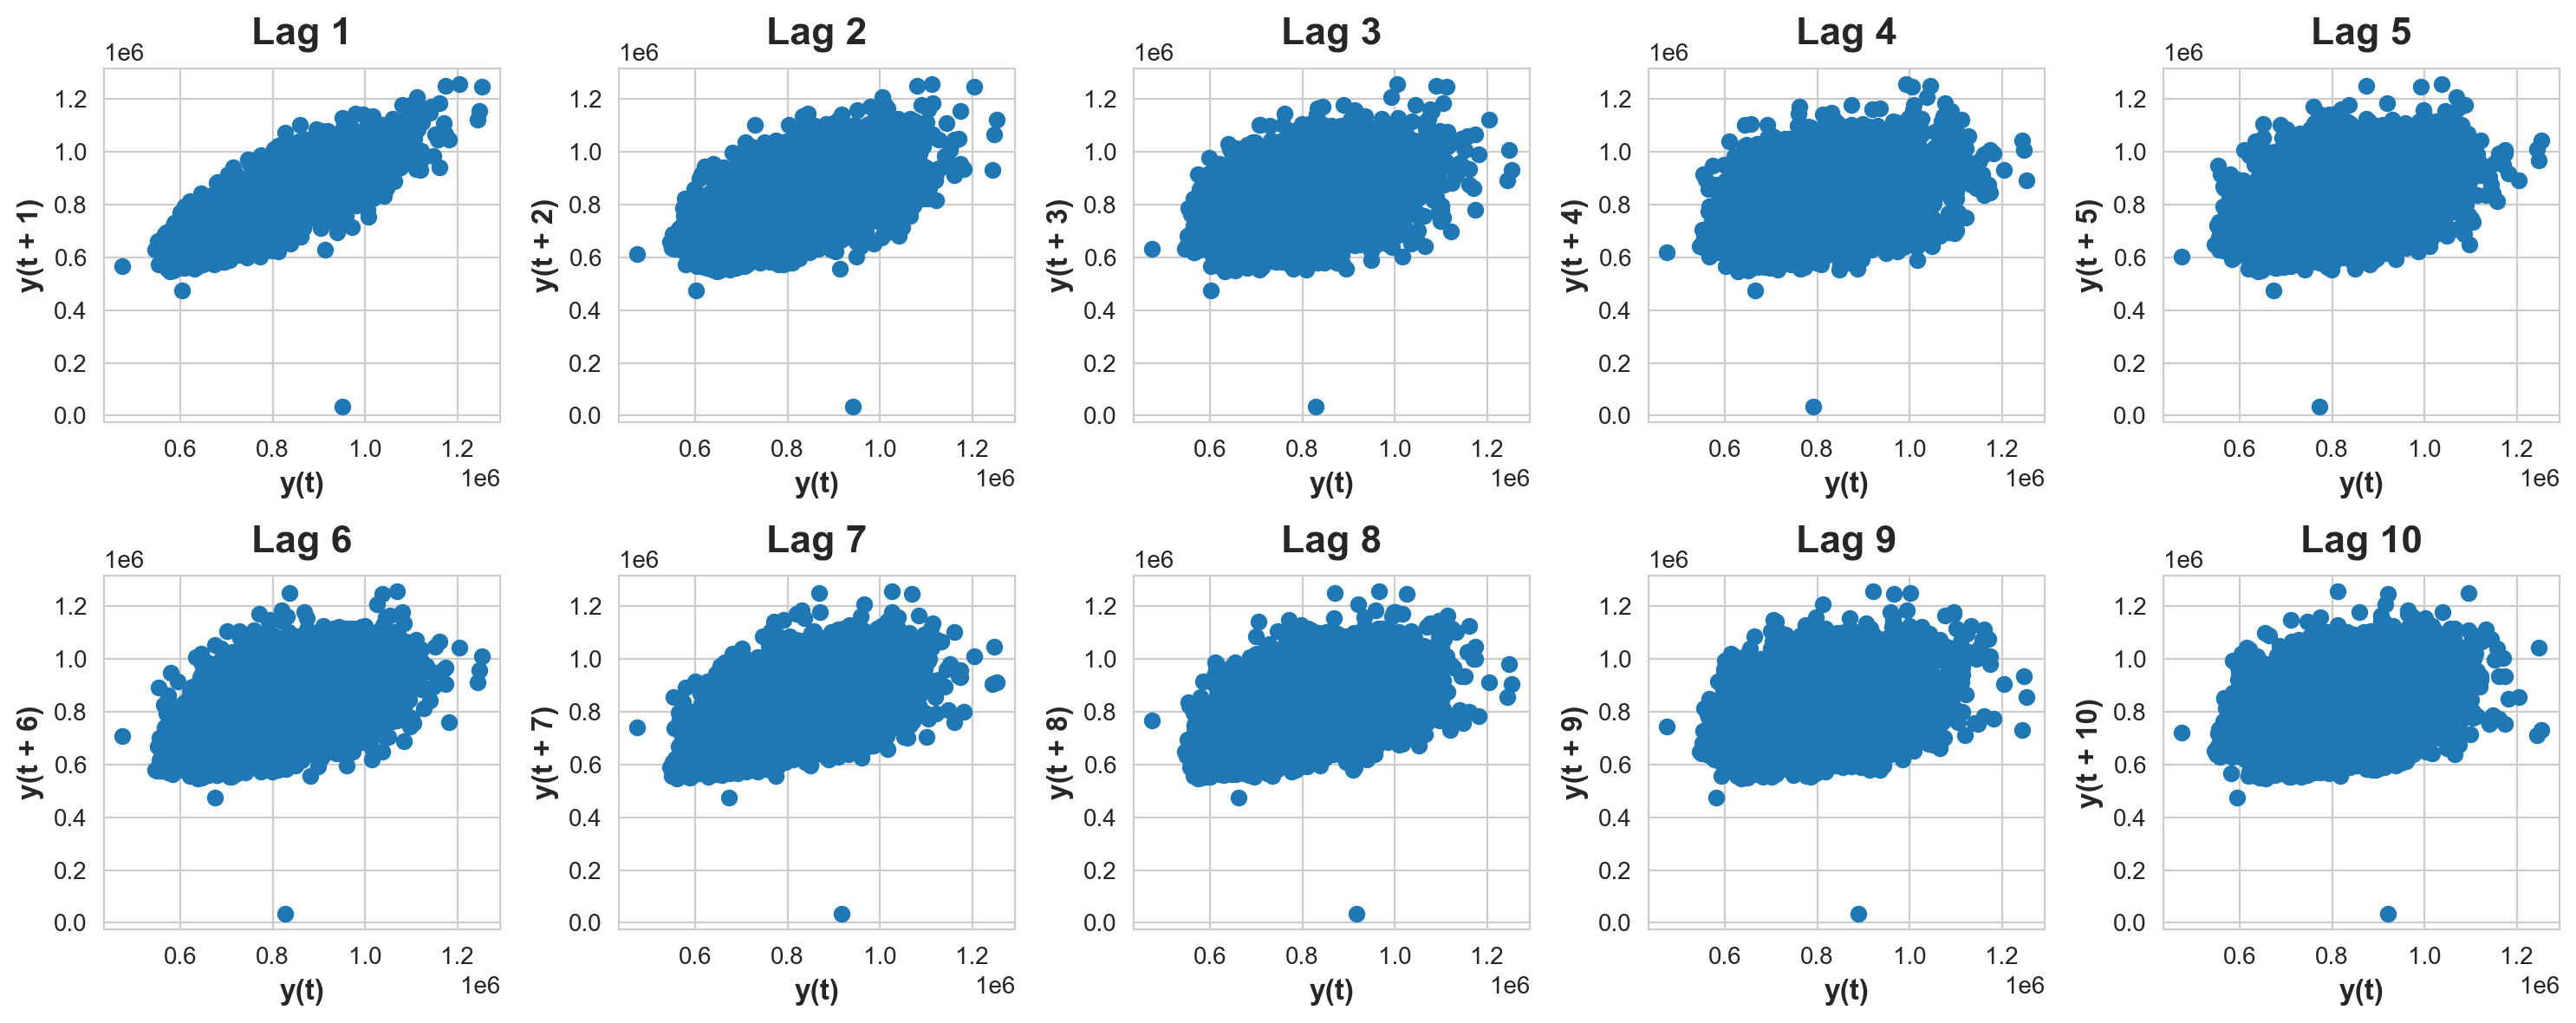

<Figure size 1100x400 with 0 Axes>

In [142]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten(), start=1):
    lag_plot(df["PJME_MW"], lag=i, ax=ax)
    ax.set_title(f"Lag {i}")
plt.show()
plt.savefig("../reports/figures/lag_plots_10.png", dpi=200, bbox_inches="tight")